<a href="https://colab.research.google.com/github/sewah2012/classification_cifar/blob/master/TD_Classification_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## TD ET Devoir pour 29 JUIN 2024
## Nom: SEWAH,
## Prenom: Emmanuel Sahr

# Classification d'une petite base de données d'images couleur (CIFAR-10)

Le dataset CIFAR-10 (Canadian Institute For Advanced Research) est une collection d'images qui sont couramment utilisées pour tester les performances des algorithmes de l'apprentissage automatique et les algorithmes de vision par ordinateur. C'est l'un des datasets les plus utilisés pour la recherche sur l'apprentissage machine. L'ensemble de données CIFAR-10 contient 60 000 images 32x32 en couleur réparties en 10 classes différentes. Les 10 classes différentes représentent des avions, des voitures, des oiseaux, des chats, des cerfs, des chiens, des grenouilles, des chevaux, des bateaux et des camions. Il y a 6 000 images dans chaque classe. Les noms des classes sont ici https://www.cs.toronto.edu/~kriz/cifar.html

Pour plus de détails: https://en.wikipedia.org/wiki/CIFAR-10

## Importation des bibliothèques

In [1]:
import tensorflow

In [2]:
tensorflow.__version__

'2.15.0'

In [3]:
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

## Diviser les données en train/test

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


**Question 1:** Ecrivez un code qui montre le nombre des données d'apprentissage et données de test, et aussi la taille des images utilisées

In [5]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image size:', x_train[0].shape)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
image size: (32, 32, 3)


### Visualizer quelques exemples

Les détails des classes sont ici https://www.cs.toronto.edu/~kriz/cifar.html

**Question 2:** Ecrivez un code qui choisit un nombre au hasard entre 0 et 50000 puis affiche l'image correspondante dans les images de training

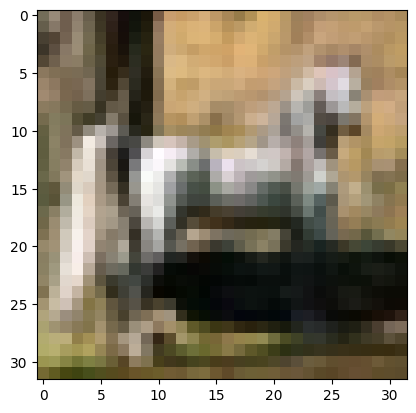

In [6]:
# Choisir un nombre au hasard entre 0 et 50000
random_index = np.random.randint(0, 50000)

# Afficher l'image correspondante
plt.imshow(x_train[random_index])
plt.show()


**Question 3:** Ecrivez un code qui affiche la classe de l'image sélectionnée précedemment

In [7]:
# Afficher la classe de l'image sélectionnée
print('Class:', y_train[random_index][0])


Class: 7


## Conversion en one-hot encoding

**Question 4:** Faites la conversion des labels y en one-hot encoding

In [8]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## Construisons notre ConvNet

**Question 5:** En regardant le model.summary() ci dessous, reconstruisez le code de réseaux de neurones

```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               819712    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
=================================================================
Total params: 890,410
Trainable params: 890,410
Non-trainable params: 0
_________________________________________________________________
```

(pour les activations utilisez des ReLU et pour le dropout utilisez 30%, la taille des filtres c'est 3x3)

In [9]:
#### ici écrivez le code du convnet
# Initialiser le modèle
model = Sequential()

# Ajouter la première couche de convolution
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Ajouter la deuxième couche de convolution
model.add(Conv2D(32, (3, 3), activation='relu'))
# Ajouter la première couche de pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# Ajouter la première couche de dropout
model.add(Dropout(0.25))

# Ajouter la troisième couche de convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
# Ajouter la quatrième couche de convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
# Ajouter la deuxième couche de pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# Ajouter la deuxième couche de dropout
model.add(Dropout(0.25))

# Aplatir les couches
model.add(Flatten())

# Ajouter la première couche complètement connectée (dense)
model.add(Dense(512, activation='relu'))
# Ajouter la troisième couche de dropout
model.add(Dropout(0.5))

# Ajouter la couche de sortie
model.add(Dense(10, activation='softmax'))


In [10]:
### vérifiez si votre model.summary() est similaire à l'énoncé de la question
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

### Normalisation des données d'entrée

**Question 6:** Normalisez les données d'entrées de train et de test

In [11]:
# Normaliser les données d'entrée
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


### Choix de l'optimiseur et compilation du modèle

**Question 7:** Définisser l'optimiseur ADAM avec un learning rate de $10^{-3}$

In [12]:
# Définir l'optimiseur
optimizer = keras.optimizers.Adam(learning_rate=0.001)


**Question 8:** Compiler le modèle avec la bonne fonction de coût et afficher aussi la métrique "accuracy"

In [14]:
# Compiler le modèle
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


"nvidia-smi" sert à checker la carte GPU utilisée, vérifier que vous avez activer la GPU dans ce colab: onglet "Execution -> modifier le type de l'Execution"

In [15]:
!nvidia-smi

Sun Jun 30 18:11:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0              29W /  70W |    119MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### **Entraînement**

**Question 9:** Entraînez votre modèle, prenez un batch size de 32 et un nombre d'epochs de 20

In [17]:
# Entraîner le modèle
batch_size = 32
epochs = 20
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


Epoch 1/20
1563/1563 [==============================] - 16s 7ms/step - loss: 1.5415 - accuracy: 0.4346 - val_loss: 1.1544 - val_accuracy: 0.5838
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1415 - accuracy: 0.5953 - val_loss: 0.9588 - val_accuracy: 0.6689
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9847 - accuracy: 0.6524 - val_loss: 0.8845 - val_accuracy: 0.6915
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8992 - accuracy: 0.6839 - val_loss: 0.8064 - val_accuracy: 0.7217
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8346 - accuracy: 0.7040 - val_loss: 0.7973 - val_accuracy: 0.7292
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7928 - accuracy: 0.7200 - val_loss: 0.7625 - val_accuracy: 0.7363
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7617 - accuracy: 0.7318 - val_loss: 0.7718 - val_accur

**Question 10:** Affichez les courbes de train loss et val loss

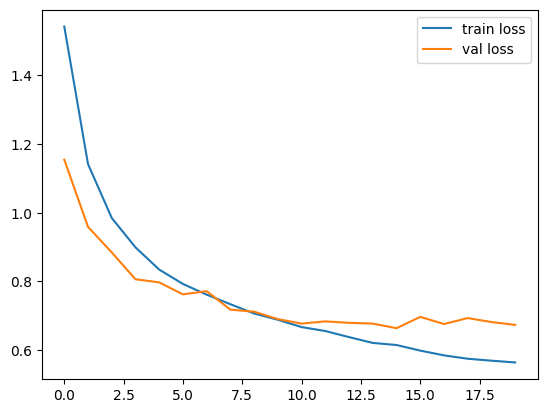

In [18]:
# Afficher les courbes de train loss et val loss
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


### Score sur le test dataset

**Question 11:** Afficher le score sur les données de test

In [19]:
# Évaluer le modèle sur les données de test
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.6736928224563599
Test accuracy: 0.7781000137329102


**Question 12**: testez sur un exemple et donnez le numéro de la classe, vérifiez dans le site CIFAR donnée dans l'introduction quelle est le nom de la classe

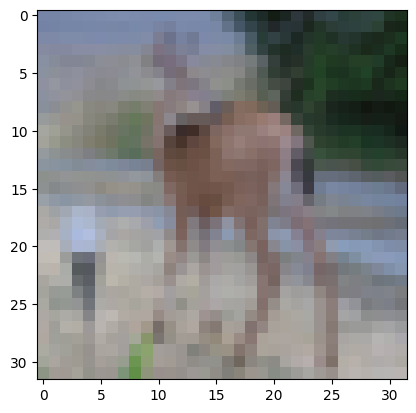

In [20]:
plt.imshow(x_test[100,:,:,:])

In [21]:
# ce code vous donne le numéro de la classe
np.argmax(model.predict(x_test[100,None,:,:,:]))

1/1 [==============================] - 0s 356ms/step


4